<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

In [115]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [116]:
shops.shape

(7616, 3)

In [117]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

In [118]:
shops['coffee_shop_name'].nunique()

79

In [119]:
shops['coffee_shop_name'].value_counts(normalize=True)

Epoch Coffee                            0.052521
Halcyon                                 0.039391
The Factory - Cafe With a Soul          0.032038
Houndstooth Coffee                      0.026261
Venezia Italian Gelato                  0.026261
                                          ...   
Lucky Lab Coffee                        0.003283
Sister Coffee                           0.002232
Kowabunga Coffee                        0.002101
The Marvelous Vintage Tea Party Co.     0.001313
Lola Savannah Coffee Downtown           0.000525
Name: coffee_shop_name, Length: 79, dtype: float64

In [120]:
shops['star_rating'].value_counts(normalize=True)

 5.0 star rating     0.496324
 4.0 star rating     0.309874
 3.0 star rating     0.096901
 2.0 star rating     0.060399
 1.0 star rating     0.036502
Name: star_rating, dtype: float64

In [121]:
# replace string ratings with integers

shops['star_rating'] = shops['star_rating'].str.replace('[.].*', '').astype(int)

In [122]:
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [123]:
shops.dtypes

coffee_shop_name    object
full_review_text    object
star_rating          int64
dtype: object

In [124]:
# remove leading and trailing whitespace from string columns

shops['coffee_shop_name'] = shops['coffee_shop_name'].str.strip()
shops['full_review_text'] = shops['full_review_text'].str.strip()

In [125]:
# do all reviews start with a date?

shops['full_review_text'].str.match('\d?\d/\d?\d/\d{4}').all()

True

In [126]:
# remove dates, trim leading/trailing whitespace, and lowercase the review texts

shops['full_review_text'] = shops['full_review_text'].str.replace('\d?\d/\d?\d/\d{4}', '').str.strip().str.lower()

In [137]:
# remove anything that is not a letter or whitespace from the review texts

shops['full_review_text'] = shops['full_review_text'].str.replace('[^a-zA-Z\s]', '').str.replace('\s+', ' ')

In [62]:
import spacy

nlp = spacy.load("en_core_web_lg")

In [141]:
# define additional stop words

my_stop_words = ['food', 'latte', 'place', 'austin', 'order', 'get',
                 'work', 'drink', 'shop', 'try', 'coffee', 'come',
                 'time', 'check', 'little', 'tea', 'go', 'people', 
                 'restaurant', 'spot', 'staff', 'friend']

STOP_WORDS = nlp.Defaults.stop_words.union(my_stop_words)

In [142]:
# add lemmatizations for the reviews to the dataframe

import re

has_number_pattern = re.compile('\d')
is_empty_pattern = re.compile('^\s*$')

lemmas = []

for doc in nlp.pipe(shops['full_review_text'], batch_size=500):
    doc_lemmas = []
    for token in doc:
        if (not token.is_stop # ignore stop words
            and not token.is_punct # ignore punctuation
            and token.pos_ != 'PRON' # ignore pronouns
            and not is_empty_pattern.match(token.text) # ignore empty strings
            and not has_number_pattern.search(token.text) # ignore words containing numerals
            and len(token.lemma_) >= 3 # ignore 1 and two letter words
            and token.lemma_ not in STOP_WORDS): # ignore lemmad stop words
                doc_lemmas.append(token.lemma_)
    lemmas.append(doc_lemmas)

assert len(lemmas) == shops.shape[0]

shops['lemmas'] = lemmas
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas
0,The Factory - Cafe With a Soul,check in love love loved the atmosphere every...,5,"[love, love, love, atmosphere, corner, style, ..."
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,"[list, date, night, ambiance, beautiful, love,..."
2,The Factory - Cafe With a Soul,check in listed in brunch spots i loved the e...,4,"[list, brunch, love, eclectic, homey, plush, d..."
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howev...,2,"[cool, decor, good, nice, seating, overprice, ..."
4,The Factory - Cafe With a Soul,check in they are located within the northcro...,4,"[locate, northcross, mall, shopping, center, f..."


In [143]:
# takes a corpus of document and returns and dataframe of word counts for us to analyze
#  - from lecture notebook

from collections import Counter


def count(docs):

    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [144]:
wc = count(shops['lemmas'])
wc.head(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
135,good,3601,5425,1.0,0.018492,0.018492,0.472820
95,great,2862,3966,2.0,0.013519,0.032011,0.375788
147,like,2279,3390,3.0,0.011555,0.043567,0.299238
17,love,1825,2393,4.0,0.008157,0.051724,0.239627
47,nice,1511,1807,5.0,0.006160,0.057883,0.198398
177,friendly,1634,1732,6.0,0.005904,0.063787,0.214548
258,don,1164,1440,7.0,0.004909,0.068696,0.152836
627,delicious,1272,1413,8.0,0.004816,0.073512,0.167017
134,service,1217,1394,9.0,0.004752,0.078264,0.159795
21,pretty,1085,1372,10.0,0.004677,0.082940,0.142463


In [145]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

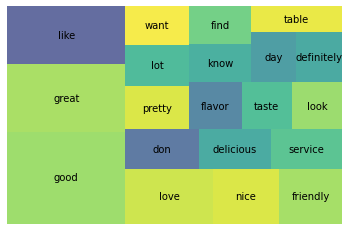

In [146]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [147]:
wc.shape

(12905, 7)

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [148]:
shops['good'] = shops['star_rating'] >= 4

In [149]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,lemmas,good
0,The Factory - Cafe With a Soul,check in love love loved the atmosphere every...,5,"[love, love, love, atmosphere, corner, style, ...",True
1,The Factory - Cafe With a Soul,listed in date night austin ambiance in austin...,4,"[list, date, night, ambiance, beautiful, love,...",True
2,The Factory - Cafe With a Soul,check in listed in brunch spots i loved the e...,4,"[list, brunch, love, eclectic, homey, plush, d...",True
3,The Factory - Cafe With a Soul,very cool decor good drinks nice seating howev...,2,"[cool, decor, good, nice, seating, overprice, ...",False
4,The Factory - Cafe With a Soul,check in they are located within the northcro...,4,"[locate, northcross, mall, shopping, center, f...",True


In [151]:
good_words = count(shops[shops['good']]['lemmas'])
bad_words = count(shops[~shops['good']]['lemmas'])
good_words.shape, bad_words.shape

((11378, 7), (6321, 7))

In [152]:
good_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
169,good,2952,4419,1.0,0.019273,0.019273,0.480782
95,great,2514,3494,2.0,0.015239,0.034512,0.409446
166,like,1683,2442,3.0,0.010651,0.045162,0.274104
17,love,1613,2137,4.0,0.009320,0.054483,0.262704
151,friendly,1446,1523,5.0,0.006642,0.061125,0.235505


In [153]:
bad_words.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
16,good,649,1006,1.0,0.015698,0.015698,0.439702
30,like,596,948,2.0,0.014793,0.030492,0.403794
94,great,348,472,3.0,0.007365,0.037857,0.235772
15,service,348,451,4.0,0.007038,0.044895,0.235772
159,don,351,445,5.0,0.006944,0.051839,0.237805


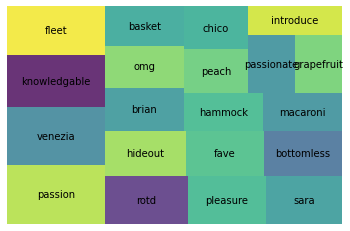

In [167]:
only_good = good_words[~good_words['word'].isin(bad_words['word'])]

top20_good = only_good[:20]

squarify.plot(sizes=top20_good['pct_total'], label=top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

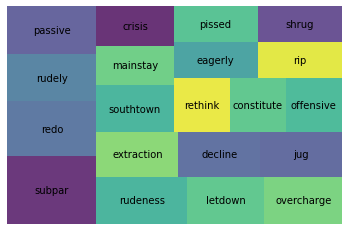

In [166]:
only_bad = bad_words[~bad_words['word'].isin(good_words['word'])]

top20_bad = only_bad[:20]

squarify.plot(sizes=top20_bad['pct_total'], label=top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


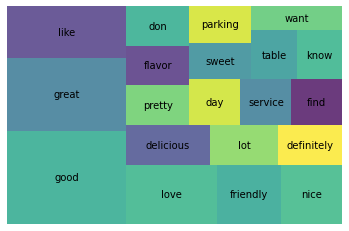

In [169]:
words_only_in_both = good_words[good_words['word'].isin(bad_words['word'])]

top20_both = words_only_in_both[:20]

squarify.plot(sizes=top20_both['pct_total'], label=top20_both['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [172]:
for word in top20_both['word']:
    good_count = good_words[good_words['word']==word]['count'].values[0]
    bad_count = bad_words[bad_words['word']==word]['count'].values[0]
    print(f'{word}: appears {good_count} times in reviews of good places, and {bad_count} in reviews of bad places.')

good: appears 4419 times in reviews of good places, and 1006 in reviews of bad places.
great: appears 3494 times in reviews of good places, and 472 in reviews of bad places.
like: appears 2442 times in reviews of good places, and 948 in reviews of bad places.
love: appears 2137 times in reviews of good places, and 256 in reviews of bad places.
friendly: appears 1523 times in reviews of good places, and 209 in reviews of bad places.
nice: appears 1444 times in reviews of good places, and 363 in reviews of bad places.
delicious: appears 1323 times in reviews of good places, and 90 in reviews of bad places.
lot: appears 1082 times in reviews of good places, and 245 in reviews of bad places.
definitely: appears 1007 times in reviews of good places, and 152 in reviews of bad places.
pretty: appears 1006 times in reviews of good places, and 366 in reviews of bad places.
flavor: appears 1006 times in reviews of good places, and 216 in reviews of bad places.
don: appears 995 times in reviews o

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

